#  Titanic Data Analysis

 Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
# Retrieving the data from csv file
### STEP 1
titanic_data=pd.read_csv('train.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:

# To get the information about titanic data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Number of passengers (Collecting Data)
print("Number of passengers = ",str(len(titanic_data.index)))
print("Number of passengers who survived : ",titanic_data['Survived'].sum())

Number of passengers =  891
Number of passengers who survived :  342


<AxesSubplot:xlabel='Survived', ylabel='count'>

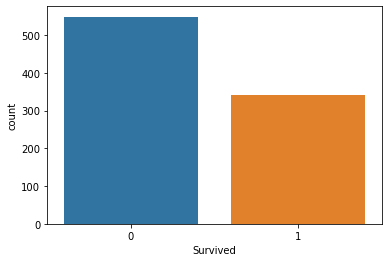

In [5]:
### STEP 2 : Analyzing Data
# How many people survived and how many did not survive (count plot)
sns.countplot(x="Survived",data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

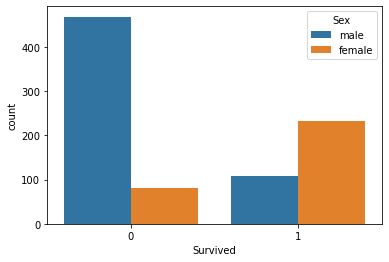

In [6]:
# Out of all the people who survived how many men and how many females
sns.countplot(x="Survived",hue="Sex",data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

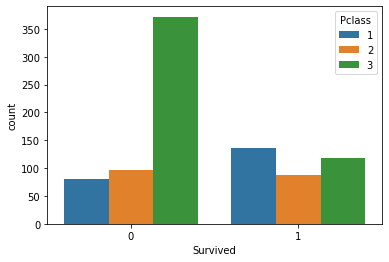

In [7]:
# The survival rate depending on the Passenger class
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

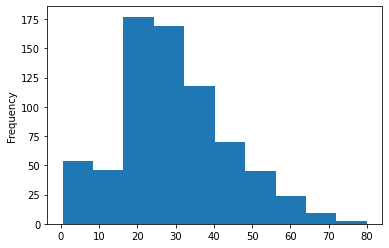

In [8]:
# Analysing the travellers agewise
titanic_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

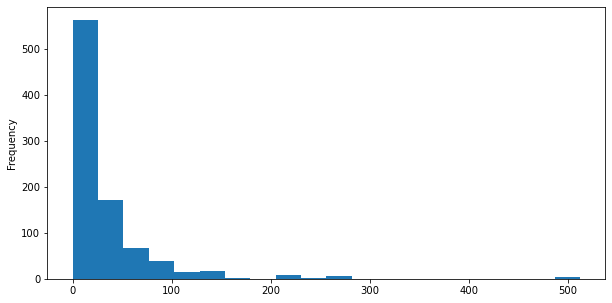

In [9]:
# Analysis by fare price
titanic_data['Fare'].plot.hist(bins=20,figsize=(10,5))


<AxesSubplot:ylabel='Frequency'>

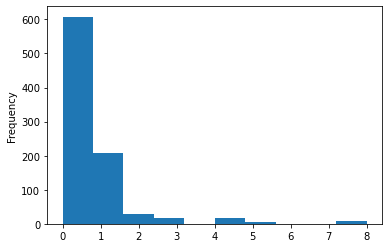

In [10]:
# Analysis of passengers with Siblings or Spouse
titanic_data['SibSp'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

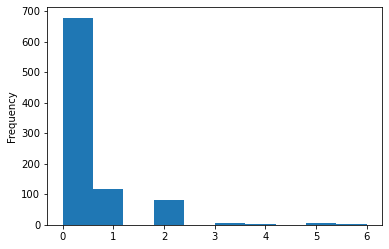

In [11]:
# Parent and child in Titanic
titanic_data['Parch'].plot.hist()


In [12]:
###  STEP 3 : Data Wrangling or Data Cleaning
titanic_data.isnull()
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

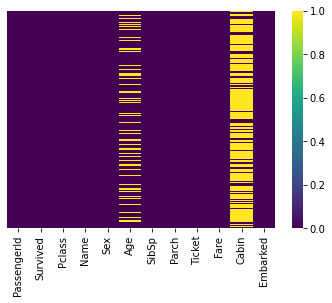

In [13]:
##  Heat Map to display the extend of null values more clearly
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap="viridis")

Here I am cleaning the data by dropping the columns with null values

In [14]:

#  Dropping the columns having null values
titanic_data.head(5)
titanic_data.drop("Cabin",axis=1,inplace=True)
titanic_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Dropped the column 'Cabin' as it contains null values and we dont require that column for our analysis either.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

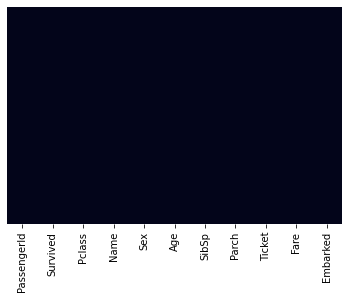

In [15]:
# Dropping Null values
titanic_data.dropna(inplace=True)

# Checking the data for no nan values
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)
titanic_data.isnull().sum()
 

In [16]:
titanic_data.head(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S


In [17]:
sex=pd.get_dummies(titanic_data['Sex'])
sex.head(5)


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [18]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)  # Dropping the first column

In [19]:
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [20]:
# Passenger Class
pcl=pd.get_dummies(titanic_data['Pclass'])
pcl.head(5)


,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [21]:
pcl=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [22]:
# Embarked S, C and Q
embark=pd.get_dummies(titanic_data['Embarked'])
embark.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [23]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
# Concatenate all the new rows to Titanic Table Dataset
titanic_data=pd.concat([titanic_data,sex,embark,pcl],axis=1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [25]:
# Drop all the unwanted columns
titanic_data.drop(['Sex','Name','PassengerId','Ticket','Embarked','Pclass','Fare'],axis=1,inplace=True)
titanic_data.head(5)

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [26]:
#Train and test the data
X=titanic_data.drop(['Survived'],axis=1)
Y=titanic_data['Survived']

In [27]:
# Splitting data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.3,random_state=1)

In [28]:
from sklearn.linear_model import LogisticRegression
# Creating Instances
logmodel=LogisticRegression()
#Fit to the model
logmodel.fit(x_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [29]:
# PREDICTION
predictions=logmodel.predict(x_test)
# How my model is performing using the classifications Report
from sklearn.metrics import classification_report
classification_report(y_test,predictions)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[242,  56],
       [ 55, 146]], dtype=int64)